### Darcy equation

In this tutorial we present how to solve a Darcy equation with [PyGeoN](https://github.com/compgeo-mox/pygeon) in themoving domain case (the upper boundary will move).  The unkwons are the velocity $u$, the elevation head $h$ and the height of the upper boundary $\eta$.

Let $\Omega=(0,1)\times(0,\eta)$ with boundary $\partial \Omega$ and outward unit normal ${\nu}$. Given 
$K$ the matrix permeability, we want to solve the following problem: find $(\bm{u}, h)$ such that
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
K^{-1} {\bm{u}} + \nabla h = {0}\\
S_s \frac{\partial{h}}{\partial t} + \nabla \cdot {u} = f
\end{array}
&\text{in } \Omega
\end{array}
\right.
$$

In order to solve the problem, we will perfom a change of coordinates to a reference domain $\hat{\Omega}=(0,1)^2$ through the (linear) trasnformation $R : \Omega \rightarrow \hat{\Omega}$ (and its inverse function $D : \hat{\Omega} \rightarrow \Omega$).
Recall that $\hat{\nabla}R=(\nabla D)^{-1}$.

Let $\hat{h}$ and $\hat{\bm{u}}$ be $h$ and $\bm{u}$ respectevely in the reference domain and let $\hat{K}$ be the transformed permeability matrix, defined as $\hat{K}=det(\hat{\nabla}D) (\hat{\nabla} D)^{-1} K (\hat{\nabla} D)^{-T}$.

The equation describing the motion of $\partial_{top}\Omega$ is:
$$

\phi \frac{\partial \eta}{\partial t} = \hat{u_3} + I(t)

$$

The transformed equations in $\hat{\Omega}$ is:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\hat{K}({\eta})^{-1} {\hat{u}} + \hat{\nabla} \hat{h} = {0}\\
\hat{S}_s \frac{\partial{\hat{h}}}{\partial t} + \hat{\nabla} \cdot {\hat{\bm{u}}} = f
\end{array}
&\text{in } \hat{\Omega}
\end{array}
\right.
$$
with boundary conditions:
$$ \hat{h} = \eta \text{ on } \Gamma \qquad \hat{h} = \ell \text{ on } \Gamma_D \qquad \hat{\bm{\nu}} \cdot \hat{\bm{u}} = 0 \text{ on } \Gamma_N$$

The weak formulation will be:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta)^{-1} {\bm{\hat{u}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s \frac{\partial{\hat{h}}}{\partial t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}} v \, d\Omega = \int_{\Omega} fv \, d\Omega\\
\int_{\Gamma} \phi \frac{\partial \eta}{\partial t} v \, d\sigma = \int_{\Gamma} \hat{u_3} v \, d\sigma + \int_{\Gamma} I(t) v \, d\sigma
\end{array}
\end{array}
\right.
$$

For the time discretization, we will employ a backward Euler scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1})^{-1} {\bm{\hat{u}}^{n+1}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s^{n+1} \frac{\hat{h}^{n+1} - \hat{h}^{n}}{\Delta t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}} v \, d\Omega = \int_{\Omega} f^{n+1}v \, d\Omega\\
\int_{\Gamma} \phi \eta^{n+1} v \, d\sigma = \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

To deal with the non-linear term, we will employ a simple Picard scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1}_k)^{-1} {\bm{\hat{u}_{k+1}^{n+1}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1}_{k+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega + \int_{\Gamma} \eta^{n+1}_{k+1} \bm{v} \cdot \bm{\nu} \, d\Omega= - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\Delta t \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}_{k+1}} v \, d\Omega + \int_{\Omega} \hat{S}_s \hat{h}^{n+1}_{k+1} v \, d\Omega = \int_{\Omega} \hat{S}_s \hat{h}^{n} v \, d\Omega + \Delta t \int_{\Omega} f^{n+1}v \, d\Omega\\
- \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n+1}_{k+1} v \, d\sigma = \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

The matrix formulation will be:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
M_u(\bm{\eta}^{n+1}_{k}) \bm{u}^{n+1}_{k+1} + B^T\bm{h}^{n+1}_{k+1} + B_{\Gamma}^T \bm{\eta}^{n+1}_{k+1}= \bm{BC}^{n+1}\\
- \Delta t B \hat{\bm{u}}^{n+1}_{k+1} + S_s M_{h} \bm{\hat{h}^{n+1}_{k+1}} = \Delta t \bm{F}^{n+1} + S_s M_{h} \bm{\hat{h}^{n}}\\
- \Delta t B_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} + \phi M_{\Gamma} \bm{\eta^{n+1}_{k+1}} = \phi M_{\Gamma} \bm{\eta^{n}} + \Delta t \bm{I}^{n+1}
\end{array}
\end{array}
\right.
$$

$$
\left(
\begin{array}{cc} 
M_u(\bm{\eta^{n+1}_k}) & B^T & B_{\Gamma}^T\\
-\Delta t B & S_s M_h & 0\\
-\Delta t B_{\Gamma} & 0 & \phi M_{\Gamma}
\end{array}
\right)
\left(
\begin{array}{c} 
\bm{u^{n+1}_{k+1}}\\ 
\bm{h^{n+1}_{k+1}}\\
\bm{\eta^{n+1}_{k+1}}
\end{array}
\right)
=\left(
\begin{array}{c} 
\bm{BC}^{n+1}\\ 
\Delta t \bm{F}^{n+1} + S_s M_h \bm{h}^n\\
\phi M_{\Gamma} \bm{\eta}^n + \Delta t \bm{I}^{n+1}
\end{array}
\right)
$$

We will start to test the method in the case $M_u(\bm{h_k}^{n+1})=\bm{I}$

In [1]:
%load_ext Cython

In [2]:
import numpy as np
import scipy.sparse as sps
from math import ceil, floor, log10, exp, isnan
import os, shutil, sys

import porepy as pp
import pygeon as pg
import scipy.integrate as integrate

import matplotlib.pyplot as plt

import scipy as sc
import sympy as sp

/opt/conda/lib/python3.11/site-packages/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


In [3]:
import utilities.chi_func as helper_chi_func
from utilities.moving_richards.stifness_matrix import stifness
from utilities.moving_richards.mass_matrix import global_mass

In [4]:
output_directory = 'primal'

### Parameters

In [5]:
T = 1
dt = 0.05 #0.0125

In [6]:
infiltration_rate = 1e-3
extraction_rate = 0.3

In [7]:
# Van Genuchten model parameters ( relative permeability model )
theta_s = 0.396
theta_r = 0.131

alpha = 0.423

n = 2.06
K_s = 4.96e-2

m = 1 - 1/n

phi = (theta_s - theta_r)

In [8]:
N = 10 # 16
quad_order = 3

# Domain tolerance
domain_tolerance = 1 / (10 * N)

In [9]:
# Set the maximum number of iterations of the non-linear solver
max_iterations_per_step = 1000

# L-scheme parameter
L   = 5e-2

# Relative and absolute tolerances for the non-linear solver
abs_tol = 1e-10
rel_tol = 1e-5

numeric_tol = 1e-10

### Grid and $V_h$

In [10]:
# convert the grid into a mixed-dimensional grid
sd = pp.StructuredTriangleGrid([N, N], [1, 1])
sd.compute_geometry()
pg.convert_from_pp(sd)

In [11]:
boundary_grid, boundary_face_map, boundary_node_map = pp.partition.extract_subgrid(sd, sd.face_centers[1, :] == 0, faces=True)

In [12]:
mdg = pg.as_mdg(sd)

In [13]:
subdomain, data = mdg.subdomains( return_data=True )[0]

In [14]:
key = "flow"

darcy_data = {}
initial_pressure = []

In [15]:
h_field     = pg.Lagrange1(key)
gamma_field = pg.Lagrange1(key)

In [16]:
subdomain, data = mdg.subdomains(return_data=True)[0]

In [17]:
def initial_h_func(x): return 1
def infiltration(x, t): return 0#infiltration_rate

In [18]:
eta_mask = sd.nodes[1, :] == 0

In [19]:
dof_p = h_field.ndof(subdomain)

### Mapping

In [20]:
eta_var = sp.Symbol('eta', negative=False)
x3_var  = sp.Symbol('x3',  negative=False)

In [21]:
chi_expr = eta_var + (2-eta_var) * x3_var

In [22]:
chi     = sp.lambdify([eta_var, x3_var],                   chi_expr)
chi_x3  = sp.lambdify([eta_var, x3_var],  sp.diff(chi_expr, x3_var))
chi_eta = sp.lambdify([eta_var, x3_var], sp.diff(chi_expr, eta_var))

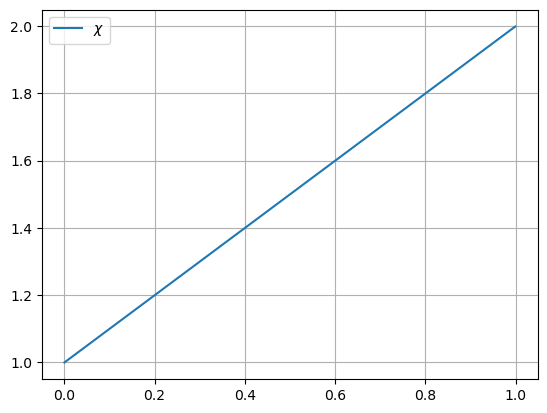

In [23]:
fig = plt.figure()
ax = fig.subplots(1,1)

ax.plot(np.arange(0., 1., 1/1000), chi(np.ones(shape=(1000, )), np.arange(0., 1., 1/1000)))

ax.legend(['$\chi$', '$\chi_{x_3}$', '$\chi_{\eta}$'])

ax.grid()

In [24]:
def convert_heights(eta_dofs, heights):
    if len(eta_dofs) == len(heights):
        return chi(eta_dofs, heights)
    else:
        return chi( np.tile(eta_dofs, ceil(len(heights) / len(eta_dofs))) , heights)

### $\theta$ and $K$

In [25]:
# Symbolic psi
h_var = sp.Symbol('h', negative=True)

# Symbolic Theta
theta_expression = theta_r + (theta_s - theta_r) / (1 + (-alpha * (h_var - chi_expr)) ** n) ** m
effective_saturation = (theta_expression - theta_r) / (theta_s - theta_r)

# Symbolic Conductivity K
hydraulic_conductivity_expression = K_s * (effective_saturation ** 0.5) * ( 1 - (1 - effective_saturation ** (1 / m)) ** m ) ** 2

In [26]:
# Theta lambda
theta_lambda = sp.lambdify([h_var, eta_var, x3_var], sp.Piecewise(
    (theta_expression, h_var < chi_expr),
    (theta_s, True)
), 'numpy')

# Conductivity tensor lambda
conductivity_lambda = sp.lambdify([h_var, eta_var, x3_var], sp.Piecewise(
    (hydraulic_conductivity_expression, h_var < chi_expr),
    (K_s, True)
), 'numpy')

In [27]:
# Actual (and final) theta function
def theta(h, eta):
    return theta_lambda( h, np.tile(eta, round(len(h) / len(eta))), subdomain.nodes[1, :])

In [28]:
def conductivity(h, eta, x3):
    return conductivity_lambda(h, eta, x3)

### BC

##### Dirichlet (essential)

In [29]:
dirichlet_flag = np.logical_and(sd.nodes[0, :] == 1, sd.nodes[1, :] > 0)

In [30]:
dirichlet_value = np.array(dirichlet_flag, dtype=float) * 0.5

In [31]:
dirichlet_value[dirichlet_flag]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

##### Neumann (natural)

In [32]:
def neumann_cond(ls_eta):
    rows = []
    cols = []
    data = []

    faces = np.where(subdomain.face_centers[0, :] == 0)[0]
    for edge_id in faces:
        nodes = subdomain.face_nodes.indices[subdomain.face_nodes.indptr[edge_id]:subdomain.face_nodes.indptr[edge_id+1]]
        
        for node, func in zip(nodes, [(lambda y: 1-y), (lambda y: y)]):
            tmp = 1/2 #integrate.fixed_quad( lambda y : chi_x3(ls_eta, subdomain.nodes[1, nodes[0]] + y) * func(y), 0, 1, n=5)[0]

            rows.append(node)
            data.append(-extraction_rate * tmp / N)
            cols.append(0)
    
    return sps.coo_array((data, (rows, cols)), shape=(subdomain.num_nodes, 1), dtype=float).todense()[:, 0]

### Matrix Assembly

In [33]:
eta_diff = gamma_field.assemble_diff_matrix( boundary_grid )
eta_diff[0,0] = -1
eta_diff *= N

In [34]:
M_gamma = gamma_field.assemble_mass_matrix( boundary_grid )
M_h = h_field.assemble_mass_matrix(subdomain)

#### Restrictor matrices

In [35]:
restrict_eta = np.array(eta_mask, dtype=float)
restrict_eta = sps.csr_matrix(np.diag(restrict_eta, k=0))

In [36]:
upscale_to_h = np.zeros(shape=(sd.num_nodes, boundary_grid.num_nodes))
upscale_to_h[ eta_mask , np.arange(boundary_grid.num_nodes) ] = 1
upscale_to_h = sps.csr_matrix(upscale_to_h)

In [37]:
proj_psi = h_field.eval_at_cell_centers(subdomain)

### Solve System

In [38]:
if os.path.exists(output_directory):
    shutil.rmtree(output_directory)

In [39]:
# Fixed rhs
fixed_rhs = np.zeros(dof_p)

In [40]:
# Initial conditions
sol = [h_field.interpolate(sd, initial_h_func)]

In [41]:
def save_step(sol, saver, i):
    ins = list()

    ins.append((sd, "cell_h", proj_psi @ sol))

    saver.write_vtu(ins, time_step=i)

In [42]:
# Save the initial solution
saver = pp.Exporter(mdg, 'sol', folder_name=output_directory)
save_step(sol[-1], saver, 0)

In [43]:
csv_base = os.path.join(output_directory, 'csv')
os.mkdir( csv_base )

In [44]:
fake_eta_dof = lambda t: np.ones_like(boundary_grid.nodes[1, :]) + t * boundary_grid.nodes[0, :]

In [45]:
def edit_sol(sol, time):
    sol[eta_mask] = fake_eta_dof(time)
    return sol

In [46]:
# Time Loop
for i in range(1, int(T/dt)+1):
    print('Time ' + str(i * dt))
    current_time = i * dt

    # Prepare the solution at the previous time step and ...
    prev = sol[-1].copy() # edit_sol(, current_time)

    # Prepare the rhs
    time_rhs = fixed_rhs.copy()

    debug_saver = pp.Exporter(mdg, str(i) + '_sol', folder_name=os.path.join(output_directory, 'debug'))
    save_step(sol[-1], debug_saver, 0)
    
    time_rhs -= phi / dt * upscale_to_h @ M_gamma @ sol[-1][eta_mask] #/ prev[eta_mask][0]
    
    # Non-linear loop
    for k in range(max_iterations_per_step):
        A_h = stifness(eta_diff, subdomain, boundary_grid, prev[eta_mask], quad_order, 
                           chi_x3, chi_eta, prev, conductivity)
        
        # Assemble the saddle point problem
        glob_mass = global_mass(subdomain, boundary_grid, prev[eta_mask], quad_order, chi_x3)
        spp = sps.csr_matrix(L * glob_mass / dt - phi / dt * upscale_to_h @ M_gamma @ upscale_to_h.T + A_h)

        # Prepare the solver
        rhs = time_rhs.copy()
        rhs += L / dt * glob_mass @ prev

        rhs += glob_mass @ (theta(sol[-1], sol[-1][eta_mask]) - theta(prev, prev[eta_mask])) / dt

        #rhs += upscale_to_h @ M_gamma @ gamma_field.interpolate( boundary_grid, lambda x: infiltration(x, current_time))
        #rhs -= neumann_cond(prev[eta_mask][0])

        ls = pg.LinearSystem(spp, rhs)

        ls.flag_ess_bc(dirichlet_flag, dirichlet_value)

        current = ls.solve()

        # Compute the errors (with eta). Should I consider only psi? Should I compute the error on the "actual" psi values or on the dofs
        rel_err_psi  = np.sqrt( (current - prev).T @ M_h @ (current - prev) )
        abs_err_prev = np.sqrt( prev.T @ M_h @ prev )

        print('Iteration #' + format(k+1, '0' + str(ceil(log10(max_iterations_per_step)) + 1) + 'd')
              + ', error L2 relative psi: ' + format(rel_err_psi, str(5 + ceil(log10(1 / abs_tol)) + 4)
                                                     + '.' + str(ceil(log10(1 / abs_tol)) + 4) + 'f') )

        save_step(current, debug_saver, k+1)
        
        if rel_err_psi < abs_tol + rel_tol * abs_err_prev:
            break
        else:
            prev = None
            prev = current.copy()

    print('')
    sol.append( current.copy() )
    save_step(sol[-1], saver, i)

    print(sol[-1])

saver.write_pvd([t * dt for t in range(int(T/dt)+1)])

Time 0.05
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


[0.98161064 0.98205697 0.99026123]
[0.99054151 0.99026123 0.98205697]
[0.96498924 0.96565571 0.98161064]
[0.98205697 0.98161064 0.96565571]
[0.93286285 0.93374038 0.96498924]
[0.96565571 0.96498924 0.93374038]
[0.87022556 0.87110265 0.93286285]
[0.93374038 0.93286285 0.87110265]
[0.74676197 0.7470923  0.87022556]
[0.87110265 0.87022556 0.7470923 ]
[0.5        0.5        0.74676197]
[0.7470923  0.74676197 0.5       ]
Iteration #0002, error L2 relative psi:    0.04531885248740
[1.00594587 0.99907333 0.99519587]
[0.99761177 0.99519587 0.99907333]
[0.99165399 0.9957175  1.00594587]
[0.99907333 1.00594587 0.9957175 ]
[1.01479192 0.99761913 0.99165399]
[0.9957175  0.99165399 0.99761913]
[0.97554868 0.9871594  1.01479192]
[0.99761913 1.01479192 0.9871594 ]
[1.04632229 0.99230785 0.97554868]
[0.9871594  0.97554868 0.99230785]
[0.92052047 0.95610837 1.04632229]
[0.99230785 1.04632229 0.95610837]
[1.15511226 0.97603119 0.92052047]
[0.95610837 0.92052047 0.97603119]
[0.71982219 0.83747426 1.15511

<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in scalar power
  return select([less(h, eta + x3*(2 - eta)),True], [0.0496*(1 - (1 - 1.0*(0.1699265174169*(eta - h + x3*(2 - eta))**2.06 + 1)**(-1.0))**0.514563106796116)**2*(0.1699265174169*(eta - h + x3*(2 - eta))**2.06 + 1)**(-0.257281553398058),0.0496], default=nan)


[0.98002761 0.98374629 0.96665069]
[0.95003069 0.94246976 0.97456687]
[0.96665069 0.97456687 0.94246976]
[0.92575399 0.9067247  0.95003069]
[0.94246976 0.95003069 0.9067247 ]
[0.8486449  0.83986651 0.92575399]
[0.9067247  0.92575399 0.83986651]
[0.84265402 0.75966291 0.8486449 ]
[0.83986651 0.8486449  0.75966291]
[0.5        0.5        0.84265402]
[0.75966291 0.84265402 0.5       ]
[0.99508299 0.99442642 0.99572883]
[0.99518341 0.99572883 0.99442642]
[0.99273753 0.9919241  0.99508299]
[0.99442642 0.99508299 0.9919241 ]
[0.98833652 0.98701439 0.99273753]
[0.9919241  0.99273753 0.98701439]
[0.98002761 0.97831221 0.98833652]
[0.98701439 0.98833652 0.97831221]
[0.96665069 0.96370255 0.98002761]
[0.97831221 0.98002761 0.96370255]
[0.94246976 0.93942845 0.96665069]
[0.96370255 0.96665069 0.93942845]
[0.9067247  0.90025156 0.94246976]
[0.93942845 0.94246976 0.90025156]
[0.83986651 0.83546479 0.9067247 ]
[0.90025156 0.9067247  0.83546479]
[0.75966291 0.72974286 0.83986651]
[0.83546479 0.839866

<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in power
  return select([less(h, eta + x3*(2 - eta)),True], [0.265*(0.1699265174169*(eta - h + x3*(2 - eta))**2.06 + 1)**(-0.514563106796116) + 0.131,0.396], default=nan)


Iteration #0003, error L2 relative psi:    0.24605995917889
[1.00980471 0.99995304 0.99182297]
[0.99695659 0.99182297 0.99995304]
[0.98638923 0.9962434  1.00980471]
[0.99995304 1.00980471 0.9962434 ]
[1.02300358 1.00212913 0.98638923]
[0.9962434  0.98638923 1.00212913]
[0.96190493 0.99521312 1.02300358]
[1.00212913 1.02300358 0.99521312]
[1.06584042 1.01553478 0.96190493]
[0.99521312 0.96190493 1.01553478]
[0.91941865 0.97655353 1.06584042]
[1.01553478 1.06584042 0.97655353]
[1.07568624 0.98824666 0.91941865]
[0.97655353 0.91941865 0.98824666]
[1.38861572 1.21800652 1.07568624]
[0.98824666 1.07568624 1.21800652]
[-0.16850993 -0.18425422  1.38861572]
[ 1.21800652  1.38861572 -0.18425422]
[ 0.50973748  0.5        -0.16850993]
[-0.18425422 -0.16850993  0.5       ]
[0.99995304 0.9958729  0.99695659]
[0.99589496 0.99695659 0.9958729 ]
[0.9962434  0.99427004 0.99995304]
[0.9958729  0.99995304 0.99427004]
[1.00212913 0.99213664 0.9962434 ]
[0.99427004 0.9962434  0.99213664]
[0.99521312 0.9897

KeyboardInterrupt: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


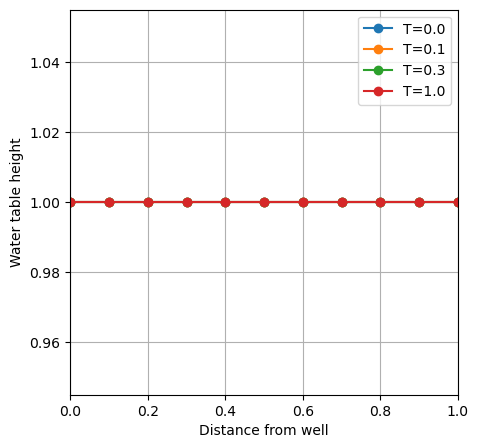

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))


#ax.set_ylim(0.65, 1.01)
ax.set_xlim(0, 1)

ax.plot( boundary_grid.nodes[0, :],  sol[0][eta_mask], 'o-')
ax.plot( boundary_grid.nodes[0, :],  sol[1][eta_mask], 'o-')
ax.plot( boundary_grid.nodes[0, :],  sol[3][eta_mask], 'o-')
ax.plot( boundary_grid.nodes[0, :], sol[-1][eta_mask], 'o-')

ax.set_xlabel('Distance from well')
ax.set_ylabel('Water table height')

ax.legend(['T=0.0', 'T=0.1', 'T=0.3', 'T=1.0'])

ax.grid()
plt.savefig('moving_darcy_original.eps', format='eps')

In [ ]:
sol[3][eta_mask]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])